# Exploratory Data Analysis

In this notebook, we explore our dataset and make some visualizations.

We analyze the data with pandas, and for the plots, we use matplotlib and seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We load the data

In [2]:
df=pd.read_csv('/home/maggie/BGA_games_recommender/1.Data_Collection/BGA_BGG_complete.csv',index_col=0)

In [3]:
print('At the moment we collect information on ' + str(df.shape[0]) + ' Board Game Arena games, that are indexed in BGG.')

At the moment we collect information on 450 Board Game Arena games, that are indexed in BGG.


In [4]:
df.head()

,url,Name,Nombre,GameID,Thumbnail,Description,Year,Min_players,Max_players,Playing_time,...,Mechanic: Action/Event,Mechanic: Targeted Clues,Mechanic: Stacking and Balancing,Mechanic: Card Play Conflict Resolution,Category: Real-time,Mechanic: Speed Matching,Mechanic: Narrative Choice / Paragraph,Mechanic: Measurement Movement,Mechanic: Movement Template,Mechanic: Semi-Cooperative Game
0,/gamepanel?game=azul,Azul,Azul,230802,https://cf.geekdo-images.com/tz19PfklMdAdjxV9W...,"Introduced by the Moors, azulejos (originally ...",2017,2,4,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/gamepanel?game=carcassonne,Carcassonne,Carcassonne,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,Carcassonne is a tile-placement game in which ...,2000,2,5,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/gamepanel?game=spacebase,Space Base,Space Base,242302,https://cf.geekdo-images.com/MHhQxXVjiaa6C-04n...,"In Space Base, players assume the roles of Com...",2018,2,5,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/gamepanel?game=splendor,Splendor,Splendor,148228,https://cf.geekdo-images.com/rwOMxx4q5yuElIvo-...,Splendor is a game of chip-collecting and card...,2014,2,4,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/gamepanel?game=sevenwondersduel,7 Wonders Duel,7 Wonders Duel,173346,https://cf.geekdo-images.com/WzNs1mA_o22ZWTR8f...,In many ways 7 Wonders Duel resembles its pare...,2015,2,2,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns of the data frame are:

In [5]:
df.columns.values

array(['url', 'Name', 'Nombre', 'GameID', 'Thumbnail', 'Description',
       'Year', 'Min_players', 'Max_players', 'Playing_time',
       'Category: Deduction', 'Category: Memory',
       'Category: Murder/Mystery', 'Mechanic: Action Points',
       'Mechanic: Hand Management', 'Mechanic: Memory', 'Designer',
       'Artist', 'Average_rating', 'Users_rated', 'Bayes_average_rating',
       'Average_weight', 'Category: Card Game', 'Category: Number',
       'Mechanic: Kill Steal', 'Mechanic: Score-and-Reset Game',
       'Mechanic: Simultaneous Action Selection', 'Category: Ancient',
       'Category: City Building', 'Category: Civilization',
       'Category: Economic', 'Mechanic: Closed Drafting',
       'Mechanic: Set Collection', 'Mechanic: Variable Player Powers',
       'Mechanic: Layering', 'Mechanic: Open Drafting',
       'Mechanic: Sudden Death Ending', 'Mechanic: Tug of War',
       'Category: Fantasy', 'Category: Fighting',
       'Mechanic: Action Queue', 'Mechanic: Team-Bas

### Missing values

We check if the data frame has missing values.

In [6]:
df.isnull().values.any()

True

Let's see which columns have missing values.

In [7]:
df.columns[df.isnull().any()].tolist() 

['Category: Deduction',
 'Category: Memory',
 'Category: Murder/Mystery',
 'Mechanic: Action Points',
 'Mechanic: Hand Management',
 'Mechanic: Memory',
 'Category: Card Game',
 'Category: Number',
 'Mechanic: Kill Steal',
 'Mechanic: Score-and-Reset Game',
 'Mechanic: Simultaneous Action Selection',
 'Category: Ancient',
 'Category: City Building',
 'Category: Civilization',
 'Category: Economic',
 'Mechanic: Closed Drafting',
 'Mechanic: Set Collection',
 'Mechanic: Variable Player Powers',
 'Mechanic: Layering',
 'Mechanic: Open Drafting',
 'Mechanic: Sudden Death Ending',
 'Mechanic: Tug of War',
 'Category: Fantasy',
 'Category: Fighting',
 'Mechanic: Action Queue',
 'Mechanic: Team-Based Game',
 'Category: Abstract Strategy',
 'Mechanic: Grid Movement',
 'Mechanic: Hexagon Grid',
 'Mechanic: Slide/Push',
 'Mechanic: Static Capture',
 'Category: Farming',
 'Mechanic: Deck, Bag, and Pool Building',
 'Category: Mythology',
 'Category: Science Fiction',
 'Mechanic: Auction/Bidding',


The only columns with missing values are the Category and Mechanic columns. A value of 1.0 in these columns means that the game belongs to that category or has that mechanic. So, we complete the missing values (all the missing values of the data frame) with 0.0, and in this case means that the game does not belong to the category or does not have the mechanic.

In [8]:
df=df.fillna(0)

In [9]:
df.isnull().values.any()

False

### Year of publication

Let's explore the year of publication. First, we look at which is the oldest game in BGA.

In [10]:
print('The oldest game in BGA is ' + df.loc[df.Year.idxmin()].Name +'. It is from the year ' + str(min(df.Year)) + '.')

The oldest game in BGA is Senet. It is from the year -3500.


Other old games:

In [11]:
df[['Name','Year']].sort_values('Year')[:30].style.hide_index()

Name,Year
Senet,-3500
Backgammon,-3000
Go,-2200
Nine Men's Morris,-1400
Evo: The “Game no Name”,0
Solo Whist,0
Bao la Kiswahili,0
Koi-Koi,0
Pedro,0
Bobail,0


We plot a histogram counting the games per year, for games that were published after 1950 (the majority of the games)

In [12]:
df[df.Year>=1950].shape[0]

403

In [13]:
df[df.Year<1950].shape[0]

47

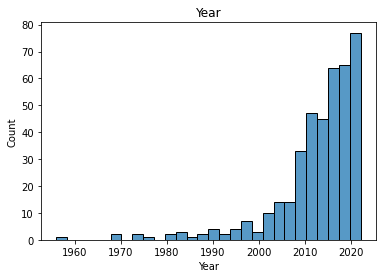

In [14]:
sns.histplot(df[df.Year>=1950].Year)
#discrete=True
plt.title('Year')
plt.show()

In [15]:
round(df[df.Year>=2010].shape[0]/df.shape[0]*100,2)

70.67

Most of the games (more than 70%) were published after 2010.

### Ratings

Now, let's explore the ratings of the games in BGA. We have two ratings: average rating and Bayes average rating.
The average rating is the average between the scores given by users. Bayes average rating is based on the average rating, but with some alterations (artificial mid-range "dummy" votes are added) to prevent games with very few votes from climbing to the top of the BGG Rank. See more details in [Board Game Geek FAQ](https://boardgamegeek.com/wiki/page/BoardGameGeek_FAQ#toc13).

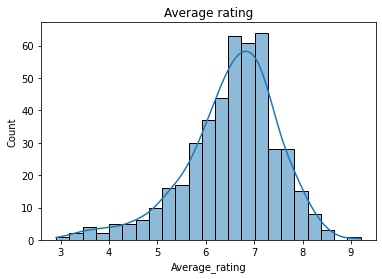

In [16]:
sns.histplot(df['Average_rating'],kde=True)
plt.title('Average rating')
plt.show()

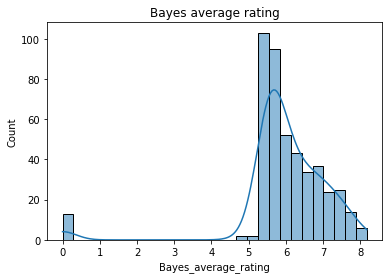

In [17]:
sns.histplot(df['Bayes_average_rating'],kde=True)
plt.title('Bayes average rating')
plt.show()

Some games do not have Bayes average rating yet.

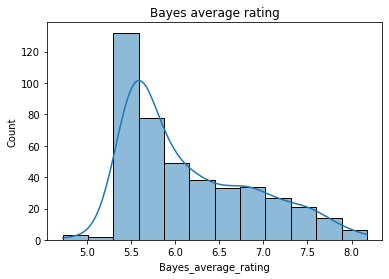

In [18]:
sns.histplot(df[df.Bayes_average_rating>0]['Bayes_average_rating'],kde=True)
plt.title('Bayes average rating')
plt.show()

#### Top 10 games by average rating and by Bayes average rating

In [19]:
df.sort_values('Average_rating',ascending=False)[['Name','Average_rating']][:10].style.hide_index()

Name,Average_rating
Trusis,9.200000
Gaia Project,8.464720
The Crew: Mission Deep Sea,8.405510
Ultimate Railroads,8.399600
Through the Ages: A new Story of Civilization,8.371890
Japanese (Riichi) Mahjong,8.280300
A Feast for Odin,8.203970
Unconditional Surrender! World War 2 in Europe,8.183460
The Castles of Burgundy,8.126120
Lost Ruins of Arnak,8.119940


In [20]:
df.sort_values('Bayes_average_rating',ascending=False)[['Name','Bayes_average_rating']][:10].style.hide_index()

Name,Bayes_average_rating
Gaia Project,8.173510
Through the Ages: A new Story of Civilization,8.138730
The Castles of Burgundy,8.005720
7 Wonders Duel,7.983990
Terra Mystica,7.956520
A Feast for Odin,7.954660
Lost Ruins of Arnak,7.866830
Puerto Rico,7.829050
Blood Rage,7.811020
The Crew,7.766510


#### Users rated

We can see how many users have rated the games.

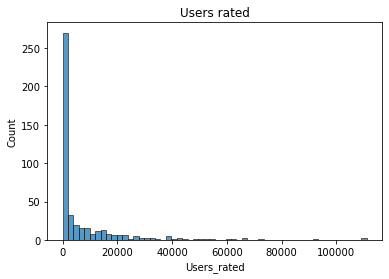

In [21]:
sns.histplot(df['Users_rated'])
plt.title('Users rated')
plt.show()

Most games don't have many votes. 

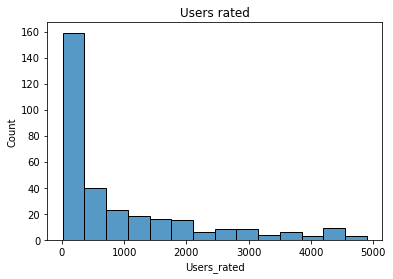

In [22]:
sns.histplot(df[df.Users_rated<5000]['Users_rated'])
plt.title('Users rated')
plt.show()

We can see the games with the most number of votes.

In [23]:
df[['Name','Users_rated']].sort_values('Users_rated',ascending=False)[:10].style.hide_index()

Name,Users_rated
Pandemic,111178
Carcassonne,110990
7 Wonders,91938
7 Wonders Duel,72740
Splendor,66702
Azul,66286
Puerto Rico,66203
King of Tokyo,62500
Love Letter,60602
Patchwork,54224


And the ones with the least number of votes.

In [24]:
df[['Name','Users_rated']].sort_values('Users_rated')[:10].style.hide_index()

Name,Users_rated
Medo,9
Alveole,12
Icebreaker,12
Solo Whist,12
Sparts,13
KQJ,16
Trusis,20
Yin Yang,22
Factum,22
Detective Poker,23


### Playing time

Let's see the playing time of the games. The playing time is in minutes.

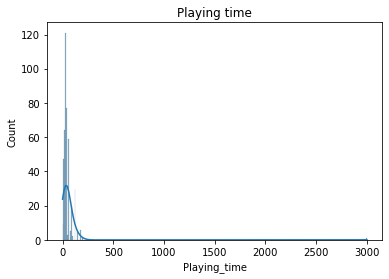

In [25]:
sns.histplot(df['Playing_time'],kde=True)
plt.title('Playing time')
plt.show()

There is a game with a very long playing time. Let's see the ones with the longest playing time.

In [26]:
df[['Name','Playing_time']].sort_values('Playing_time',ascending=False)[:10].style.hide_index()

Name,Playing_time
Unconditional Surrender! World War 2 in Europe,3000
Tumbleweed,200
Carnegie,180
Barbu,180
Space Empires: 4X,180
Go,180
City of the Big Shoulders,180
ONE,180
Puerto Rico,150
Gaia Project,150


Let's check if more games last 150 minutes.

In [27]:
df[df.Playing_time>=150][['Name','Playing_time']].sort_values('Playing_time',ascending=False).style.hide_index()

Name,Playing_time
Unconditional Surrender! World War 2 in Europe,3000
Tumbleweed,200
Space Empires: 4X,180
City of the Big Shoulders,180
Carnegie,180
Go,180
Barbu,180
ONE,180
Terra Mystica,150
Gaia Project,150


Let's plot the playing time without the game of 3000 minutes duration for a better description.

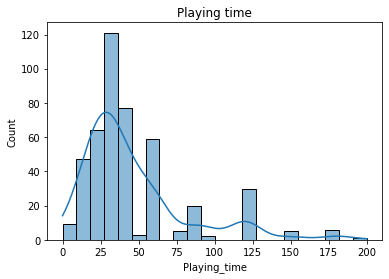

In [28]:
sns.histplot(df[df['Playing_time']<3000].Playing_time,kde=True)
plt.title('Playing time')
plt.show()

Now, let's see the games with the shortest playing time.

In [29]:
df[['Name','Playing_time']].sort_values('Playing_time')[:10].style.hide_index()

Name,Playing_time
Dodo,0
Insert,0
Zola,0
Mammalath,0
Sparts,0
Gopher,0
Chess,0
KQJ,0
Gomoku,5
Connect Four,10


Some games have 0 in playing time, which is wrong. The current playing time is missing. Let's see the games with no 0 playing time.

In [30]:
df[df.Playing_time!=0][['Name','Playing_time']].sort_values('Playing_time')[:10].style.hide_index()

Name,Playing_time
Gomoku,5
Martian Dice,10
Pylos,10
Castles of Caleira,10
Four Color Cards,10
Cinco,10
Balloon Pop!,10
Linkage,10
Mijnlieff,10
Secret Moon,10


Let's check how many are with 10 minutes of playing time or less.

In [31]:
df[(df.Playing_time!=0) & (df.Playing_time<=10)][['Name','Playing_time']].sort_values('Playing_time').style.hide_index()

Name,Playing_time
Gomoku,5
Martian Dice,10
Connect Four,10
Secret Moon,10
Get the MacGuffin,10
Kalah,10
Balloon Pop!,10
Cinco,10
Four Color Cards,10
ToeShamBo,10


### Number of players

<AxesSubplot:xlabel='Max_players', ylabel='count'>

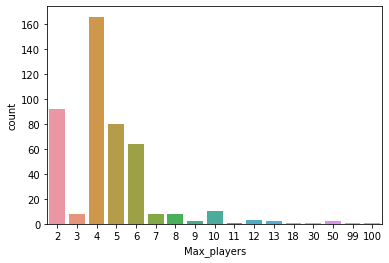

In [32]:
sns.countplot(x="Max_players", data=df, order=df.sort_values('Max_players').Max_players.unique())

Most games have 4 as the maximum number of players.

<AxesSubplot:xlabel='Min_players', ylabel='count'>

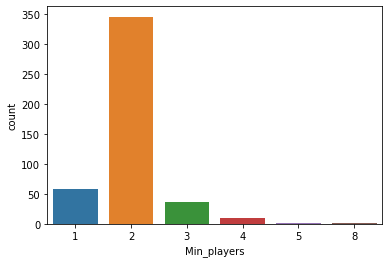

In [33]:
sns.countplot(x="Min_players", data=df, order=df.sort_values('Min_players').Min_players.unique())

In the majority of games, 2 is the minimum number of players required.

You can play in solitary mode the following number of games:

In [34]:
df[df.Min_players==1].shape[0]

58

Let's see how many games have a fixed number of players.

In [35]:
df[(df.Min_players==df.Max_players)].value_counts('Min_players')

Min_players
2    90
4     5
3     1
dtype: int64

Number of 2 player games:

In [36]:
df[(df.Min_players==2)&(df.Min_players==df.Max_players)].shape[0]

90

### Designer - Artist

Which designers have the most games on BGA? Let's see the designers that have 3 or more games.

In [37]:
v = df.Designer.value_counts()
df[df.Designer.isin(v.index[v.gt(2)])].Designer.value_counts()

['(Uncredited)']                                           39
[]                                                         10
['Sid Sackson']                                             5
['Antoine Bauza']                                           5
['Nick Bentley']                                            4
['Michael Schacht']                                         4
['Vlaada Chvátil']                                          4
['Phil Walker-Harding']                                     4
['Scott Almes']                                             4
['Uwe Rosenberg']                                           3
['Andrew Looney']                                           3
['Mark Steere']                                             3
['Ben Pinchback', 'Matt Riddle']                            3
['Frédéric Henry']                                          3
['Sébastien Dujardin', 'Xavier Georges', 'Alain Orban']     3
['Simone Luciani', 'Daniele Tascini']                       3
['Stefan

Most of the games do not have a designer/the designer is missing. The most popular designers in BGA are Antoine Bauza and Sid Sackson.

Let's see the artists.

In [38]:
w = df.Artist.value_counts()
df[df.Artist.isin(w.index[w.gt(2)])].Artist.value_counts()

[]                                      84
['Dennis Lohausen']                      7
['(Uncredited)']                         6
['Néstor Romeral Andrés']                5
['Alexandre Roche']                      4
['Anne Heidsieck']                       3
['Michael Menzel']                       3
['Franz Vohwinkel']                      3
['Martin Hoffmann', 'Claus Stephan']     3
['Xavier Gueniffey Durin']               3
['Mariano Iannelli']                     3
['Kerri Aitken']                         3
['Arnaud Demaegd']                       3
Name: Artist, dtype: int64

Most of the games do not have an artist/the artist is missing. The most popular artist in BGA is Dennis Lohausen.

### Average weight

In BGG you have a [weight metric](https://boardgamegeek.com/wiki/page/Weight), which means how complex/difficult is the game. A lower rating (lighter weight) means easier.
BGG uses a 5-point Weight scale:

1 Light  
2 Medium Light  
3 Medium  
4 Medium Heavy  
5 Heavy  

Each user can vote how heavy is a game, and then BGG computes the average weight of the game.

Let's plot a histogram of the Average weight.

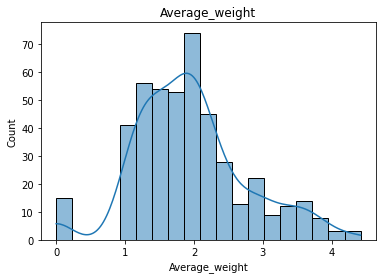

In [39]:
sns.histplot(df['Average_weight'],kde=True)
plt.title('Average_weight')
plt.show()

Some games do not have an average weight yet. Let's plot the histogram without these games.

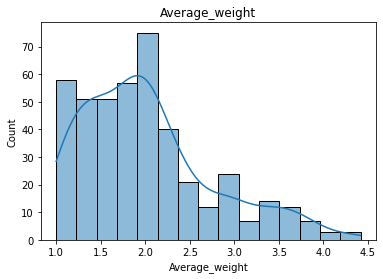

In [40]:
sns.histplot(df[df.Average_weight>0]['Average_weight'],kde=True)
plt.title('Average_weight')
plt.show()

The majority of games in BGA are not too complex.

### Correlation between variables

Let's see if there is a correlation between the numeric columns. We consider only games with Bayes_average_rating and Average_weight greater than 0.

<AxesSubplot:>

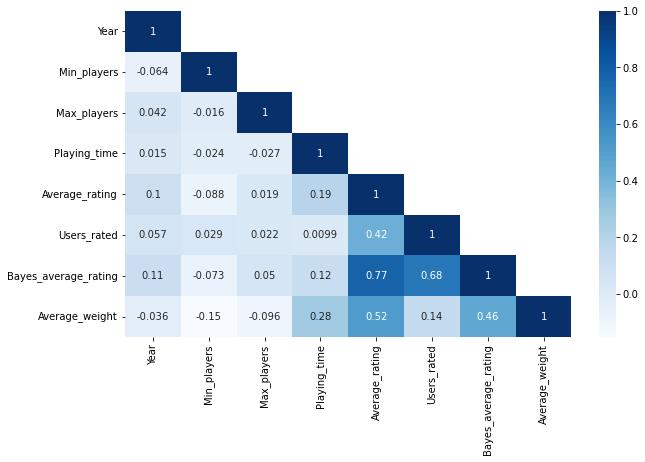

In [41]:
data=df[(df.Average_weight>0) & (df.Bayes_average_rating>0)]
data=data[['Year', 'Min_players', 'Max_players', 'Playing_time',
       'Average_rating', 'Users_rated', 'Bayes_average_rating',
       'Average_weight']]
trimask = np.tri(data.corr().shape[0],data.corr().shape[0], dtype=bool)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), 
            mask=~trimask ,
            annot=True,
            cmap="Blues")

We see that there is a correlation between the two types of rating, the number of users that rate the game with the Bayes average rating, and a moderate correlation between the average weight and the average rating. Let's see that in detail:

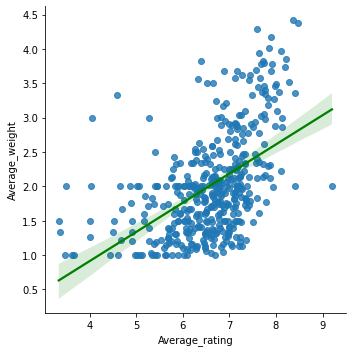

In [42]:
sns.lmplot(data=df[(df.Average_weight>0)],
    x="Average_rating", y="Average_weight", line_kws={'color': 'g'})

### Category columns

Let's explore the category columns. 

In [43]:
#category columns
category_cols = [col for col in df.columns if 'Category:' in col]

In [44]:
category_cols_2=[col.replace('Category: ', '') for col in category_cols]

In [45]:
print('We have ' + str(len(category_cols)) + ' categories.' )

We have 67 categories.


We have the following game categories:

In [46]:
sorted(category_cols_2)

['Abstract Strategy',
 'Adventure',
 'Age of Reason',
 'American West',
 'Ancient',
 'Animals',
 'Arabian',
 'Aviation / Flight',
 'Bluffing',
 'Card Game',
 "Children's Game",
 'City Building',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Environmental',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Game System',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Mafia',
 'Math',
 'Maze',
 'Medical',
 'Medieval',
 'Memory',
 'Miniatures',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Music',
 'Mythology',
 'Nautical',
 'Negotiation',
 'Novel-based',
 'Number',
 'Party Game',
 'Pirates',
 'Political',
 'Post-Napoleonic',
 'Prehistoric',
 'Print & Play',
 'Puzzle',
 'Racing',
 'Real-time',
 'Religious',
 'Renaissance',
 'Science Fiction',
 'Space Exploration',
 'Spies/Secret Agents',
 'Sports',
 'Territory Building',
 'Trains',
 'Transportation',
 'Travel',
 'Video Game Theme',
 'Wargame',
 'Word 

The category ['Print & Play'](https://boardgamegeek.com/boardgamecategory/1120/print-play) is not a category that tells us what the game is about, so we will remove it from our data frame.

In [47]:
df=df.drop(['Category: Print & Play'], axis=1)

We count the number of games that belong to each category.

In [48]:
category_cols = [col for col in df.columns if 'Category:' in col]
category_list=df[category_cols].sum().sort_values(ascending=False).index.tolist()
category_list2=[category.replace('Category: ','') for category in category_list]
category_count=df[category_cols].sum().sort_values(ascending=False)[0:].tolist()

<AxesSubplot:>

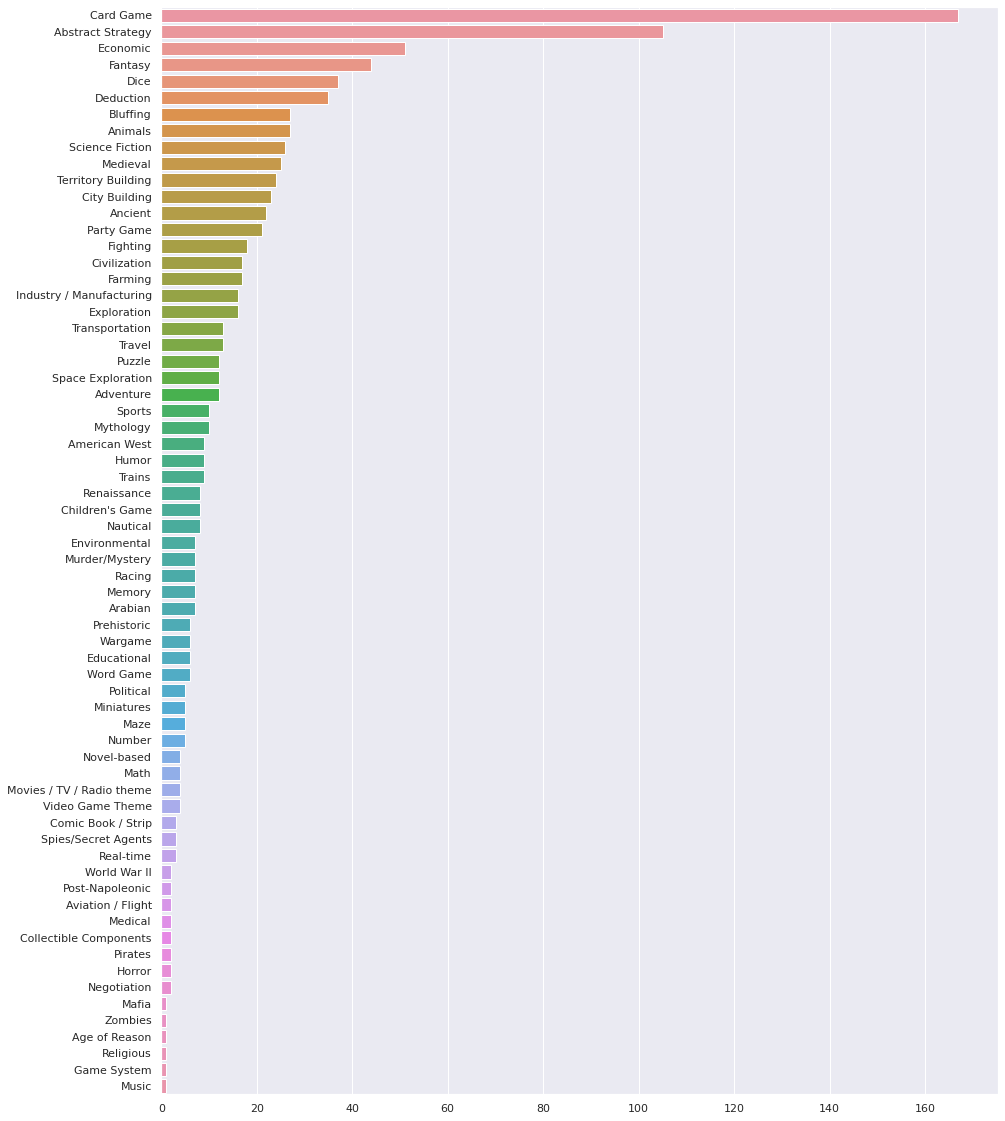

In [49]:
sns.set(rc = {'figure.figsize':(15,20)})
sns.barplot(y=category_list2,x=category_count)

The most popular categories are:

In [50]:
df[category_cols].replace('Category: ', '').sum().sort_values(ascending=False)[0:10].rename(index=dict(zip(category_list, category_list2)))

Card Game            167.0
Abstract Strategy    105.0
Economic              51.0
Fantasy               44.0
Dice                  37.0
Deduction             35.0
Bluffing              27.0
Animals               27.0
Science Fiction       26.0
Medieval              25.0
dtype: float64

In [51]:
popular_categories=df[category_cols].sum().sort_values(ascending=False).index[0:10]

Let's analyze the average weight, the average rating, and the Bayes average rating of the games by category:

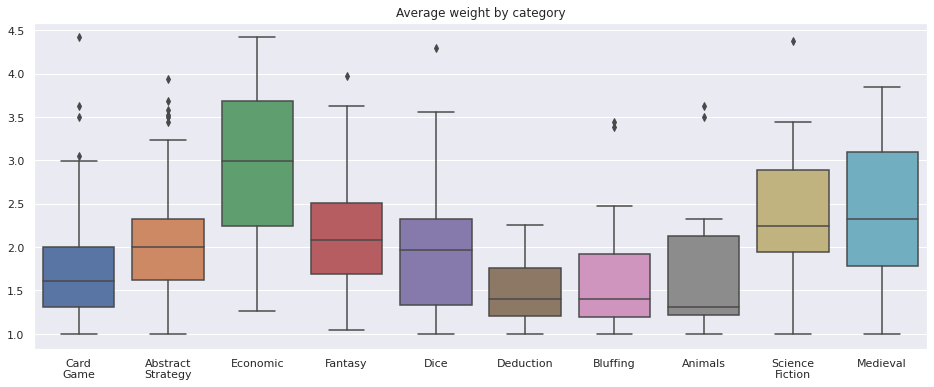

In [52]:
results = []
for category in popular_categories:
    results.append(df[(df[category]==1.0) & (df['Average_weight']>0)].Average_weight)
# boxplot algorithm comparison
fig = plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=results)
ax.set_title('Average weight by category')
#ax.set_xticklabels(category_list2[0:10])
ax.set_xticklabels([label.replace(' ', '\n') for label in category_list2[0:10]])
plt.show()

We can see that economic games are, on average, more complex than games in other categories.

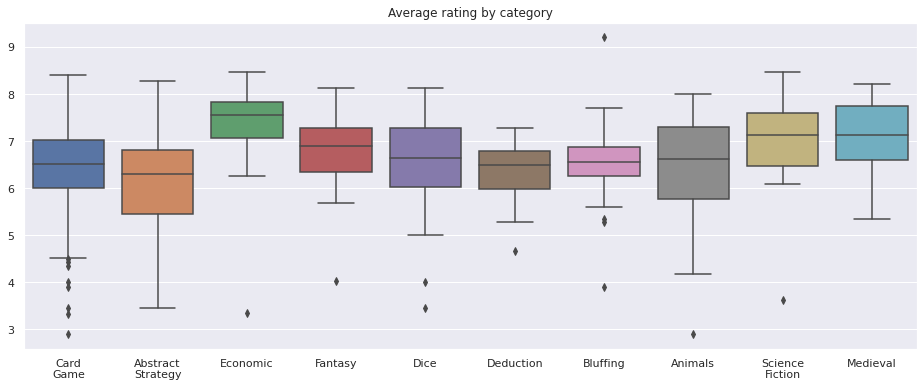

In [53]:
results = []
for category in popular_categories:
    results.append(df[(df[category]==1.0)].Average_rating)
# boxplot algorithm comparison
fig = plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=results)
ax.set_title('Average rating by category')
#ax.set_xticklabels(category_list2[0:10])
ax.set_xticklabels([label.replace(' ', '\n') for label in category_list2[0:10]])
plt.show()

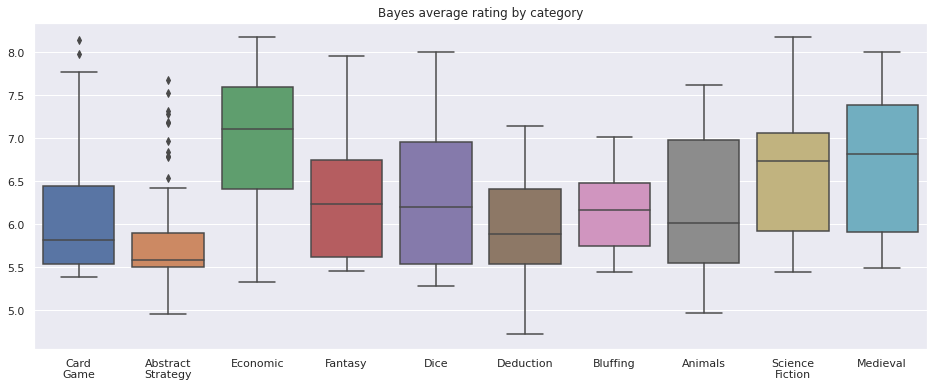

In [54]:
results = []
for category in popular_categories:
    results.append(df[(df[category]==1.0) & (df['Bayes_average_rating']>0)].Bayes_average_rating)
# boxplot algorithm comparison
fig = plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=results)
ax.set_title('Bayes average rating by category')
#ax.set_xticklabels(category_list2[0:10])
ax.set_xticklabels([label.replace(' ', '\n') for label in category_list2[0:10]])
plt.show()

Economic games also have the highest ratings on average.

### Mechanic columns

Let's explore the mechanic columns.

In [55]:
#Mechanic columns
mechanic_cols = [col for col in df.columns if 'Mechanic:' in col]   
mechanic_cols_2 = [col.replace('Mechanic: ', '') for col in mechanic_cols]

In [56]:
print('We have ' + str(len(mechanic_cols)) + ' mechanics.' )

We have 153 mechanics.


We have the following game mechanics:

In [57]:
sorted(mechanic_cols_2)

['Acting',
 'Action Drafting',
 'Action Points',
 'Action Queue',
 'Action Retrieval',
 'Action/Event',
 'Advantage Token',
 'Area Majority / Influence',
 'Area Movement',
 'Area-Impulse',
 'Auction/Bidding',
 'Auction: Dutch',
 'Auction: Dutch Priority',
 'Auction: Fixed Placement',
 'Auction: Once Around',
 'Auction: Sealed Bid',
 'Auction: Turn Order Until Pass',
 'Automatic Resource Growth',
 'Betting and Bluffing',
 'Bias',
 'Bingo',
 'Campaign / Battle Card Driven',
 'Card Play Conflict Resolution',
 'Catch the Leader',
 'Chaining',
 'Closed Drafting',
 'Closed Economy Auction',
 'Command Cards',
 'Commodity Speculation',
 'Communication Limits',
 'Connections',
 'Constrained Bidding',
 'Contracts',
 'Cooperative Game',
 'Critical Hits and Failures',
 'Deck Construction',
 'Deck, Bag, and Pool Building',
 'Deduction',
 'Delayed Purchase',
 'Dice Rolling',
 'Die Icon Resolution',
 'Different Dice Movement',
 'Enclosure',
 'End Game Bonuses',
 'Events',
 'Follow',
 'Grid Coverage',

We count the number of games that belong to each category.

In [58]:
mechanic_list=df[mechanic_cols].sum().sort_values(ascending=False).index.tolist()
mechanic_list2=[mechanic.replace('Mechanic: ','') for mechanic in mechanic_list]
mechanic_count=df[mechanic_cols].sum().sort_values(ascending=False)[0:].tolist()

<AxesSubplot:>

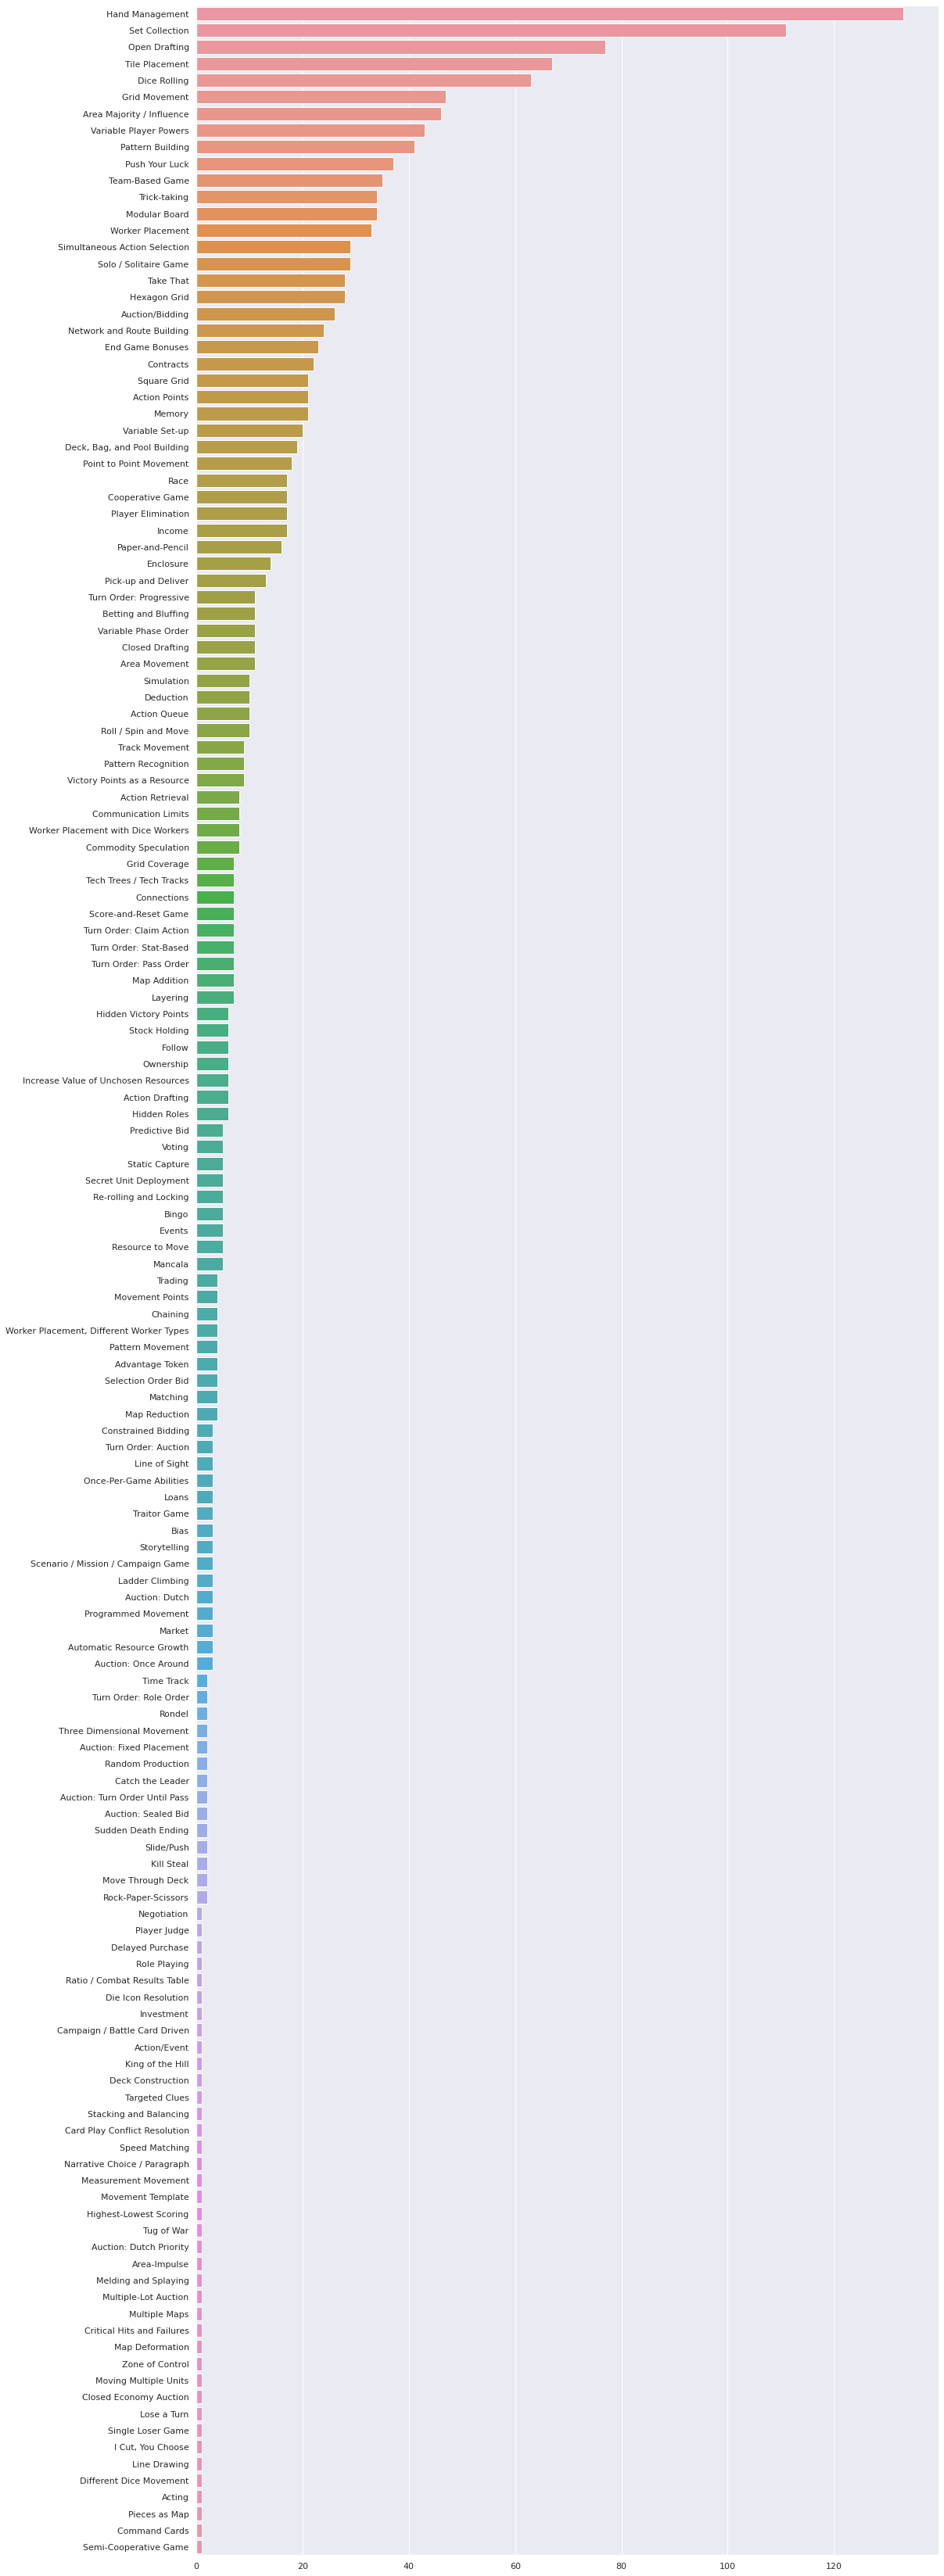

In [59]:
sns.set(rc = {'figure.figsize':(17,60)})
sns.barplot(y=mechanic_list2,x=mechanic_count)

The most popular mechanics are:

In [60]:
df[mechanic_cols].replace('Mechanic: ', '').sum().sort_values(ascending=False)[0:15].rename(index=dict(zip(mechanic_list, mechanic_list2)))

Hand Management                  133.0
Set Collection                   111.0
Open Drafting                     77.0
Tile Placement                    67.0
Dice Rolling                      63.0
Grid Movement                     47.0
Area Majority / Influence         46.0
Variable Player Powers            43.0
Pattern Building                  41.0
Push Your Luck                    37.0
Team-Based Game                   35.0
Trick-taking                      34.0
Modular Board                     34.0
Worker Placement                  33.0
Simultaneous Action Selection     29.0
dtype: float64

In [61]:
popular_mechanics=df[mechanic_cols].sum().sort_values(ascending=False).index[0:15]

Let's analyze the average weight, the average rating, and the Bayes average rating of the games by mechanic. As we have more mechanics, we consider the 15 most popular (instead of 10).

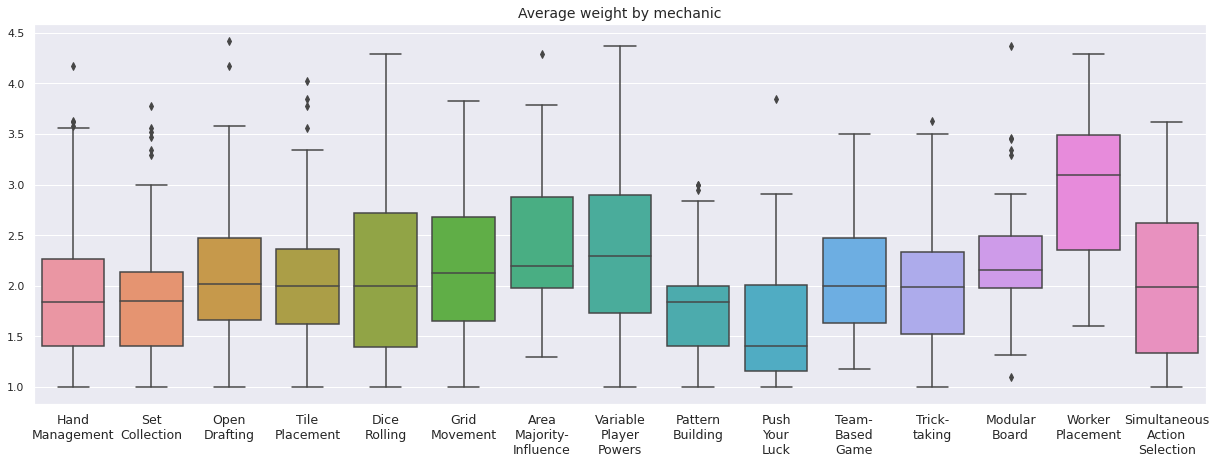

In [62]:
results = []
for mechanic in popular_mechanics:
    results.append(df[(df[mechanic]==1.0) & (df['Average_weight']>0)].Average_weight)
# boxplot algorithm comparison
fig = plt.figure(figsize=(21, 7))
ax = sns.boxplot(data=results)
ax.set_title('Average weight by mechanic',fontsize=14)
#ax.set_xticklabels(category_list2[0:10])
ax.set_xticklabels([label.replace('-','- ').replace(' / ','- ').replace(' ', '\n') for label in mechanic_list2[0:15]],fontsize=12.5)
plt.show()

We can see that the games belonging to the "Worker Placement" mechanic have a higher average weight than the others, and the "Push your luck" mechanic has the lowest average weight (on average).

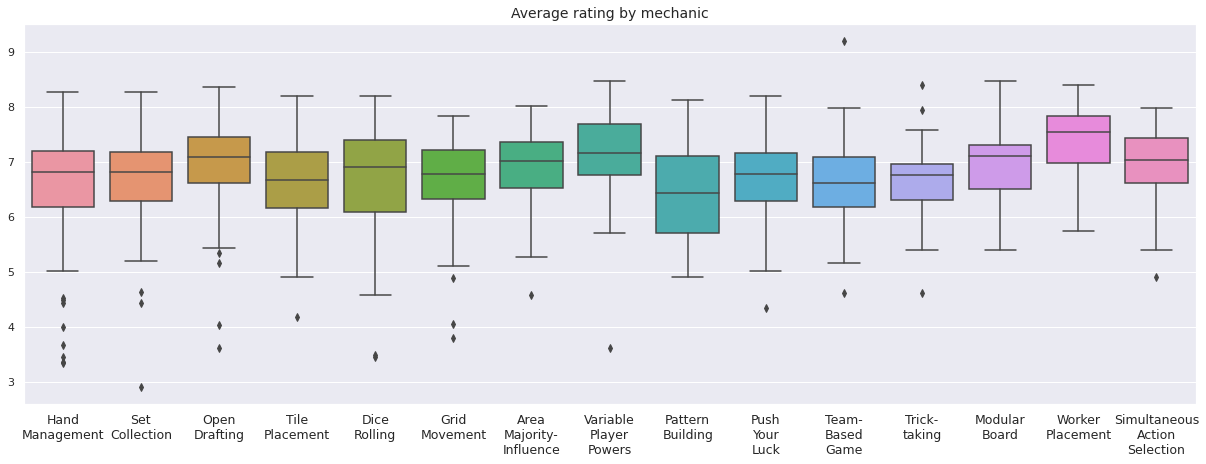

In [63]:
results = []
for mechanic in popular_mechanics:
    results.append(df[(df[mechanic]==1.0)].Average_rating)
# boxplot algorithm comparison
fig = plt.figure(figsize=(21, 7))
ax = sns.boxplot(data=results)
ax.set_title('Average rating by mechanic',fontsize=14)
#ax.set_xticklabels(category_list2[0:10])
ax.set_xticklabels([label.replace('-','- ').replace(' / ','- ').replace(' ', '\n') for label in mechanic_list2[0:15]],fontsize=12.5)
plt.show()

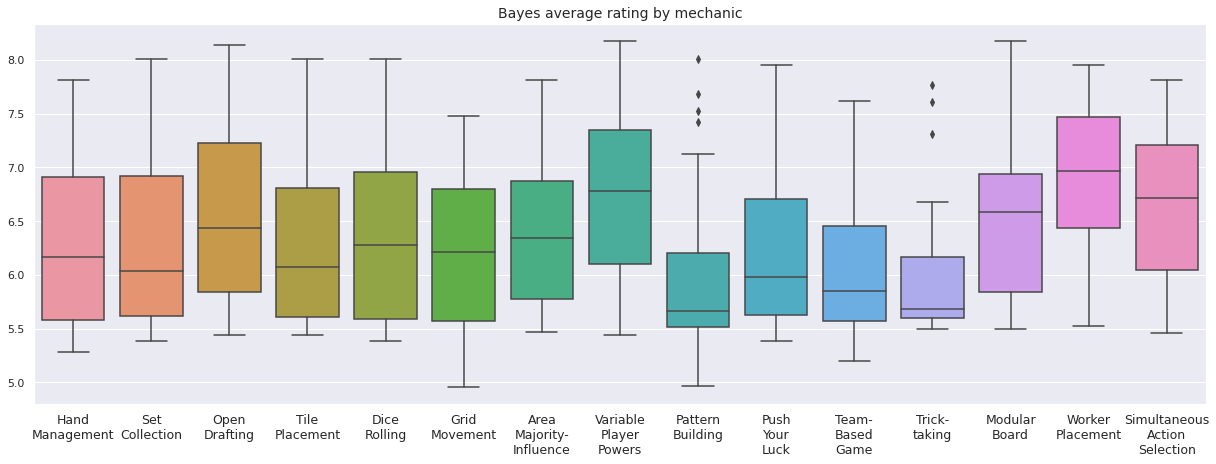

In [64]:
results = []
for mechanic in popular_mechanics:
    results.append(df[(df[mechanic]==1.0) & (df['Bayes_average_rating']>0)].Bayes_average_rating)
# boxplot algorithm comparison
fig = plt.figure(figsize=(21, 7))
ax = sns.boxplot(data=results)
ax.set_title('Bayes average rating by mechanic',fontsize=14)
#ax.set_xticklabels(category_list2[0:10])
ax.set_xticklabels([label.replace('-','- ').replace(' / ','- ').replace(' ', '\n') for label in mechanic_list2[0:15]],fontsize=12.5)
plt.show()



Games with the "Worker Placement" mechanic have the highest ratings on average.

### Combination of categories and mechanics

Let's see which combinations of category/mechanic are the most popular in BGA.

In [65]:
combination=[]
for cat in category_cols:
    for mec in mechanic_cols:
        combination.append((cat.replace('Category: ', '') + '/' + mec.replace('Mechanic: ', ''),df[(df[cat]==1.0) & (df[mec]==1.0)].shape[0]))

In [66]:
df_combination=pd.DataFrame(combination, columns=['Category/Mechanic','Number_of_games'])

In [70]:
df_combination.sort_values('Number_of_games',ascending=False)[:15].style.hide_index()

Category/Mechanic,Number_of_games
Card Game/Hand Management,80
Card Game/Set Collection,52
Dice/Dice Rolling,36
Card Game/Trick-taking,33
Card Game/Open Drafting,33
Abstract Strategy/Grid Movement,29
Card Game/Team-Based Game,24
Abstract Strategy/Pattern Building,23
Fantasy/Hand Management,22
Abstract Strategy/Tile Placement,22


The most popular combination is the category "Card Name" and mechanic "Hand Management".

We save the modified data.

In [68]:
df.to_csv('boardgames.csv',index=False)  